In [1]:
import pandas as pd
import numpy as np
dataset_name='nas100'
horizon=1
df_return=pd.read_csv(f'./data/return_RTGNN_{dataset_name}_1.csv')
index_df=pd.read_csv(f'./data/index_{dataset_name}.csv')

In [4]:
portfolio_df_performance = df_return.set_index(['datetime'])

index_df_performance = index_df.set_index(['datetime'])


alpha_df_performance = pd.DataFrame()
alpha_df_performance['portfolio_daily_return'] = portfolio_df_performance['daily_return']
alpha_df_performance['index_daily_return'] = index_df_performance['daily_return']
alpha_df_performance['alpha_daily_return'] = alpha_df_performance['portfolio_daily_return'] - \
                                                alpha_df_performance[
                                                    'index_daily_return']
alpha_df_performance['portfolio_net_value'] = (alpha_df_performance['portfolio_daily_return'] + 1).cumprod()
alpha_df_performance['index_net_value'] = (
        alpha_df_performance['index_daily_return'] + 1).cumprod()
alpha_df_performance['alpha_net_value'] = (alpha_df_performance['alpha_daily_return'] + 1).cumprod()

net_value_columns = ['portfolio_net_value',
                        'index_net_value',
                        'alpha_net_value']

alpha_statistics_df = pd.DataFrame(index=alpha_df_performance[net_value_columns].columns,
                                    columns=["年化收益", "年化波动率", "最大回撤率", "夏普率", "Calmar", "IR", "月度胜率"])

# alpha_df_performance.set_index("dt", inplace=True)
alpha_df_performance.index = pd.to_datetime(alpha_df_performance.index)
monthly_statistics_df = alpha_df_performance[net_value_columns].resample('M').last()
monthly_statistics_df = pd.concat([alpha_df_performance[:1][
                                        ['portfolio_net_value',
                                        'index_net_value', 'alpha_net_value']],
                                    monthly_statistics_df])
monthly_statistics_df = monthly_statistics_df.pct_change()
monthly_statistics_df = monthly_statistics_df.dropna()
monthly_statistics_df.index = monthly_statistics_df.index.date
## TODO 补充第一年的数据
yearly_statistics_df = alpha_df_performance[net_value_columns].resample('Y').last()
yearly_statistics_df = pd.concat([alpha_df_performance[:1][
                                        ['portfolio_net_value',
                                        'index_net_value', 'alpha_net_value']],
                                    yearly_statistics_df])
yearly_statistics_df = yearly_statistics_df.pct_change()
yearly_statistics_df = yearly_statistics_df.dropna()
yearly_statistics_df.index = yearly_statistics_df.index.date

alpha_statistics_df.loc[:, "年化收益"] = ((alpha_df_performance[net_value_columns].tail(1)) ** (252 / len(alpha_df_performance)) - 1).agg('mean')
alpha_statistics_df.loc[:, "年化波动率"] = np.std(
    alpha_df_performance[net_value_columns] / alpha_df_performance[net_value_columns].shift(1) - 1,axis=0) * np.sqrt(
    252)
alpha_statistics_df.loc[:, "累积收益"] = (alpha_df_performance[net_value_columns].tail(1) - 1).agg('mean')
alpha_statistics_df.loc[:, "累积波动率"] = np.std(
    alpha_df_performance[net_value_columns] / alpha_df_performance[net_value_columns].shift(1) - 1,axis=0)
alpha_statistics_df.loc[:, "最大回撤率"] = (
    (alpha_df_performance[net_value_columns] - alpha_df_performance[net_value_columns].cummax()) /
    alpha_df_performance[net_value_columns].cummax()).agg('min')
alpha_statistics_df.loc[:, "夏普率"] = alpha_statistics_df["年化收益"] / alpha_statistics_df["年化波动率"]
alpha_statistics_df.loc[:, "Calmar"] = alpha_statistics_df["年化收益"] / abs(alpha_statistics_df["最大回撤率"])
alpha_statistics_df.loc[:, "IR"] = (
    alpha_df_performance[net_value_columns] / alpha_df_performance[net_value_columns].shift(1) - 1).agg('mean') * np.sqrt(
    252) / np.std(alpha_df_performance[net_value_columns] / alpha_df_performance[net_value_columns].shift(1) - 1,axis=0)
alpha_statistics_df.loc[:, "月度胜率"] = monthly_statistics_df[
                                            monthly_statistics_df > 0].count() / monthly_statistics_df.count()

In [5]:
alpha_statistics_df

,年化收益,年化波动率,最大回撤率,夏普率,Calmar,IR,月度胜率,累积收益,累积波动率
portfolio_net_value,1.161183,0.256416,-0.112201,4.528512,10.349087,3.192251,0.666667,1.148005,0.016153
index_net_value,0.543734,0.180913,-0.109142,3.005495,4.981887,2.541403,0.666667,0.538423,0.011396
alpha_net_value,0.416812,0.099968,-0.036158,4.169478,11.527388,3.588872,0.916667,0.412900,0.006297


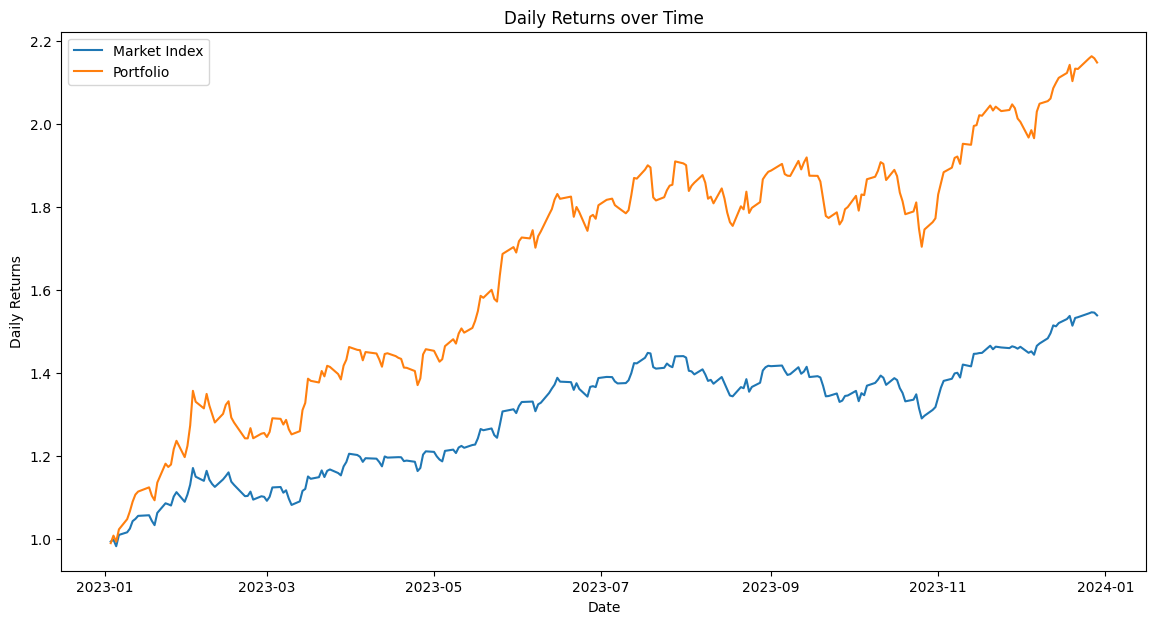

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# 设置图表大小
plt.figure(figsize=(14,7))

# 画出每日收益率
plt.plot(alpha_df_performance['index_net_value'], label='Market Index')
plt.plot(alpha_df_performance['portfolio_net_value'], label='Portfolio')

# 设置图表标题和标签
plt.title('Daily Returns over Time')
plt.xlabel('Date')
plt.ylabel('Daily Returns')

# 显示图例
plt.legend()

# 显示图表
plt.show()


In [8]:
dataset_name='hs300'
horizon=1
df_return=pd.read_csv(f'./data/return_RTGNN_{dataset_name}_1.csv')
index_df=pd.read_csv(f'./data/index_{dataset_name}.csv')

portfolio_df_performance = df_return.set_index(['datetime'])

index_df_performance = index_df.set_index(['datetime'])


alpha_df_performance = pd.DataFrame()
alpha_df_performance['portfolio_daily_return'] = portfolio_df_performance['daily_return']
alpha_df_performance['index_daily_return'] = index_df_performance['daily_return']
alpha_df_performance['alpha_daily_return'] = alpha_df_performance['portfolio_daily_return'] - \
                                                alpha_df_performance[
                                                    'index_daily_return']
alpha_df_performance['portfolio_net_value'] = (alpha_df_performance['portfolio_daily_return'] + 1).cumprod()
alpha_df_performance['index_net_value'] = (
        alpha_df_performance['index_daily_return'] + 1).cumprod()
alpha_df_performance['alpha_net_value'] = (alpha_df_performance['alpha_daily_return'] + 1).cumprod()

net_value_columns = ['portfolio_net_value',
                        'index_net_value',
                        'alpha_net_value']

alpha_statistics_df = pd.DataFrame(index=alpha_df_performance[net_value_columns].columns,
                                    columns=["年化收益", "年化波动率", "最大回撤率", "夏普率", "Calmar", "IR", "月度胜率"])

# alpha_df_performance.set_index("dt", inplace=True)
alpha_df_performance.index = pd.to_datetime(alpha_df_performance.index)
monthly_statistics_df = alpha_df_performance[net_value_columns].resample('M').last()
monthly_statistics_df = pd.concat([alpha_df_performance[:1][
                                        ['portfolio_net_value',
                                        'index_net_value', 'alpha_net_value']],
                                    monthly_statistics_df])
monthly_statistics_df = monthly_statistics_df.pct_change()
monthly_statistics_df = monthly_statistics_df.dropna()
monthly_statistics_df.index = monthly_statistics_df.index.date
## TODO 补充第一年的数据
yearly_statistics_df = alpha_df_performance[net_value_columns].resample('Y').last()
yearly_statistics_df = pd.concat([alpha_df_performance[:1][
                                        ['portfolio_net_value',
                                        'index_net_value', 'alpha_net_value']],
                                    yearly_statistics_df])
yearly_statistics_df = yearly_statistics_df.pct_change()
yearly_statistics_df = yearly_statistics_df.dropna()
yearly_statistics_df.index = yearly_statistics_df.index.date

alpha_statistics_df.loc[:, "年化收益"] = ((alpha_df_performance[net_value_columns].tail(1)) ** (252 / len(alpha_df_performance)) - 1).agg('mean')
alpha_statistics_df.loc[:, "年化波动率"] = np.std(
    alpha_df_performance[net_value_columns] / alpha_df_performance[net_value_columns].shift(1) - 1,axis=0) * np.sqrt(
    252)
alpha_statistics_df.loc[:, "累积收益"] = (alpha_df_performance[net_value_columns].tail(1) - 1).agg('mean')
alpha_statistics_df.loc[:, "累积波动率"] = np.std(
    alpha_df_performance[net_value_columns] / alpha_df_performance[net_value_columns].shift(1) - 1,axis=0)
alpha_statistics_df.loc[:, "最大回撤率"] = (
    (alpha_df_performance[net_value_columns] - alpha_df_performance[net_value_columns].cummax()) /
    alpha_df_performance[net_value_columns].cummax()).agg('min')
alpha_statistics_df.loc[:, "夏普率"] = alpha_statistics_df["年化收益"] / alpha_statistics_df["年化波动率"]
alpha_statistics_df.loc[:, "Calmar"] = alpha_statistics_df["年化收益"] / abs(alpha_statistics_df["最大回撤率"])
alpha_statistics_df.loc[:, "IR"] = (
    alpha_df_performance[net_value_columns] / alpha_df_performance[net_value_columns].shift(1) - 1).agg('mean') * np.sqrt(
    252) / np.std(alpha_df_performance[net_value_columns] / alpha_df_performance[net_value_columns].shift(1) - 1,axis=0)
alpha_statistics_df.loc[:, "月度胜率"] = monthly_statistics_df[
                                            monthly_statistics_df > 0].count() / monthly_statistics_df.count()

In [9]:
alpha_statistics_df

,年化收益,年化波动率,最大回撤率,夏普率,Calmar,IR,月度胜率,累积收益,累积波动率
portfolio_net_value,0.220452,0.17005,-0.164604,1.296398,1.339286,1.173293,0.5,0.210842,0.010712
index_net_value,-0.117674,0.134871,-0.214591,-0.872494,-0.548362,-0.897015,0.25,-0.113279,0.008496
alpha_net_value,0.383486,0.100217,-0.040817,3.826544,9.39524,3.19804,0.833333,0.365779,0.006313


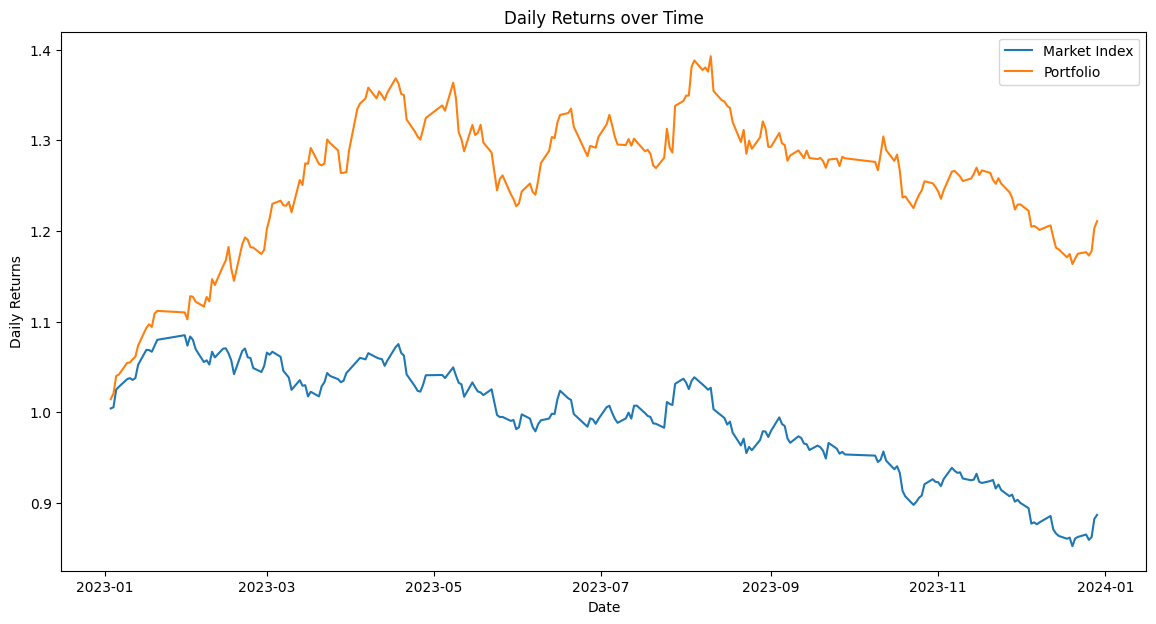

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# 设置图表大小
plt.figure(figsize=(14,7))

# 画出每日收益率
plt.plot(alpha_df_performance['index_net_value'], label='Market Index')
plt.plot(alpha_df_performance['portfolio_net_value'], label='Portfolio')

# 设置图表标题和标签
plt.title('Daily Returns over Time')
plt.xlabel('Date')
plt.ylabel('Daily Returns')

# 显示图例
plt.legend()

# 显示图表
plt.show()